🔹 Análisis de tiempos de entrega de pedidos en una empresa de envíos
Objetivo: Limpiar, transformar y analizar los datos de tiempos de entrega para identificar patrones y evaluar su comportamiento estadístico.

📌 Pasos del análisis
1. Cargar y limpiar datos:
    - Eliminar valores nulos y atípicos.
    - Estandarizar los datos.
2. Análisis exploratorio:
    - Calcular media, mediana, moda, varianza y desviación estándar.
    - Visualizar la distribución de tiempos de entrega.
3. Aplicar distribuciones de probabilidad:
    - Comprobar si los tiempos siguen una distribución normal o Poisson.
4. Visualizar relaciones:
    - Comparar tiempos de entrega por región.
    - Evaluar tendencias mensuales con gráficos de líneas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 🔹 1. Simulación de datos (en un caso real, cargaríamos un CSV)
np.random.seed(42)
datos = {
    "pedido_id": range(1, 501),
    "tiempo_entrega": np.random.normal(loc=5, scale=1.5, size=500).astype(int),  # Normal con media=5 y std=1.5
    "costo_envio": np.random.uniform(50, 200, 500),  # Costo aleatorio entre 50 y 200
    "region": np.random.choice(["Norte", "Centro", "Sur"], 500, p=[0.3, 0.4, 0.3])
}

df = pd.DataFrame(datos)
df.head()

,pedido_id,tiempo_entrega,costo_envio,region
0,1,5,146.887586,Sur
1,2,4,135.616746,Norte
2,3,5,103.414509,Sur
3,4,7,197.977287,Norte
4,5,4,140.866223,Centro


In [2]:
# 🔹 2. Limpieza de datos
df = df[df["tiempo_entrega"] > 0]  # Filtrar valores negativos
df["costo_envio"] = df["costo_envio"].round(2)  # Redondear costo de envío
df.head()

,pedido_id,tiempo_entrega,costo_envio,region
0,1,5,146.89,Sur
1,2,4,135.62,Norte
2,3,5,103.41,Sur
3,4,7,197.98,Norte
4,5,4,140.87,Centro


In [6]:
# 🔹 3. Estadísticas descriptivas
media = df["tiempo_entrega"].mean()
mediana = df["tiempo_entrega"].median()
moda = stats.mode(df["tiempo_entrega"])
varianza = df["tiempo_entrega"].var()
desviacion_estandar = df["tiempo_entrega"].std()

print(f"""
📊 Estadísticas de Tiempos de Entrega:
Media: {media}
Mediana: {mediana}
Moda: {moda[0]}
Varianza: {varianza}
Desviación Estándar: {desviacion_estandar}
""")


📊 Estadísticas de Tiempos de Entrega:
Media: 4.529058116232465
Mediana: 5.0
Moda: 5
Varianza: 2.2536720026398176
Desviación Estándar: 1.5012235018943108



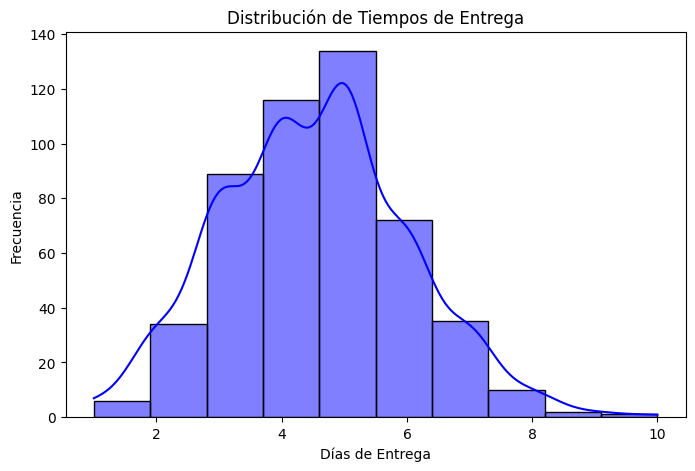

In [7]:
# 🔹 4. Visualización de la distribución de tiempos de entrega
plt.figure(figsize=(8, 5))
sns.histplot(df["tiempo_entrega"], bins=10, kde=True, color="blue")
plt.xlabel("Días de Entrega")
plt.ylabel("Frecuencia")
plt.title("Distribución de Tiempos de Entrega")
plt.show()

In [8]:
# 🔹 5. Prueba de normalidad (Shapiro-Wilk)
stat, p_value = stats.shapiro(df["tiempo_entrega"])
print(f"📌 Prueba de Normalidad: p-value = {p_value}")
if p_value > 0.05:
    print("✅ La distribución parece normal.")
else:
    print("⚠️ La distribución NO es normal.")

📌 Prueba de Normalidad: p-value = 1.217936840958727e-10
⚠️ La distribución NO es normal.


C:\Users\52771\AppData\Local\Temp\ipykernel_12488\2141482761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region", y="tiempo_entrega", data=df, palette="Set2")


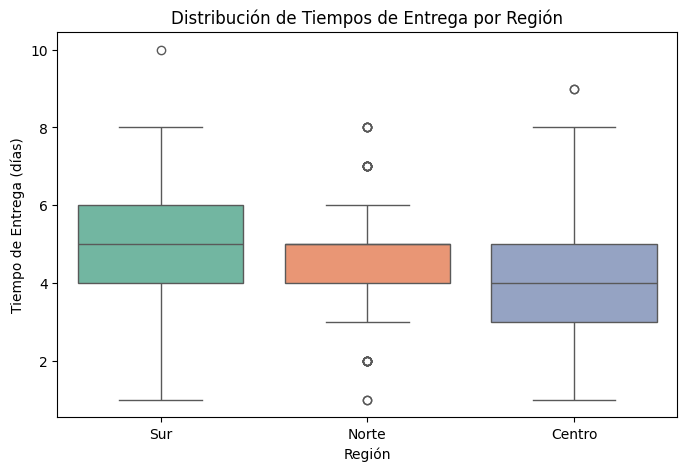

In [9]:
# 🔹 6. Distribución de tiempos de entrega por región
plt.figure(figsize=(8, 5))
sns.boxplot(x="region", y="tiempo_entrega", data=df, palette="Set2")
plt.xlabel("Región")
plt.ylabel("Tiempo de Entrega (días)")
plt.title("Distribución de Tiempos de Entrega por Región")
plt.show()

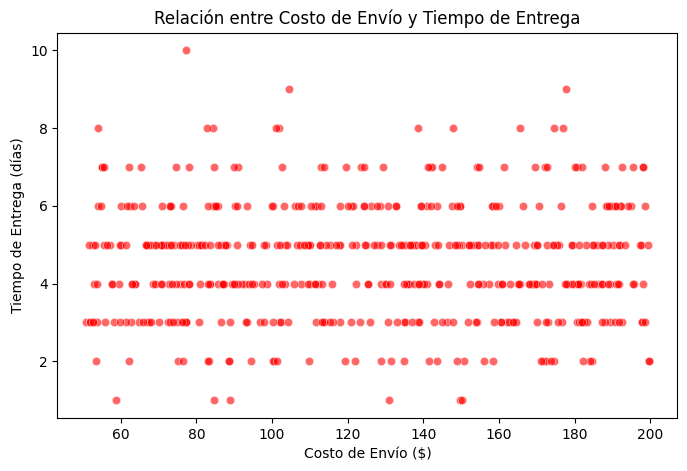

In [10]:
# 🔹 7. Comparación del costo de envío y tiempo de entrega
plt.figure(figsize=(8, 5))
sns.scatterplot(x="costo_envio", y="tiempo_entrega", data=df, color="red", alpha=0.6)
plt.xlabel("Costo de Envío ($)")
plt.ylabel("Tiempo de Entrega (días)")
plt.title("Relación entre Costo de Envío y Tiempo de Entrega")
plt.show()